In [10]:
import keras.activations
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras_tuner as kt
# from tensorflow import keras
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import layers
from tensorflow.keras import models
import time

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
train_x = x_train.astype('float32') / 255  # normalization
test_x = x_test.astype('float32') / 255
train_y = to_categorical(y_train)  # create label vectors
test_y = to_categorical(y_test)

In [38]:
epochs = 50
learning_rate = 0.001

l1 = 256
l2 = 32

target = 0.715

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 1), activation='relu'))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Flatten())
model.add(layers.Dense(l1, activation='relu'))
model.add(layers.Dense(l2, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [40]:
val_acc_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1, restore_best_weights=True)
def lr_scheduler(lr):
        return lr * 0.9
rmsprop = tf.keras.optimizers.RMSprop(                            learning_rate=learning_rate)
model.compile(optimizer=rmsprop,                                      loss='categorical_crossentropy',                                      metrics=['accuracy'], )
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 30, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 30, 30, 32)        3104      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1152)              0         
                                                                 
 dense_33 (Dense)            (None, 256)               295168    
                                                                 
 dense_34 (Dense)            (None, 32)                8224      
                                                     

In [41]:
time_start = time.time()
best_acc = 0
while best_acc < target:
    lr_callback = LearningRateScheduler(lambda lr:lr_scheduler(learning_rate))
    history = model.fit(train_x, train_y, batch_size=200, epochs=epochs, validation_split=0.2, callbacks=[val_acc_callback, lr_callback],use_multiprocessing=True)
    best_acc = max(history.history['val_accuracy'])

    learning_rate = learning_rate * 0.75
    print(best_acc)
time_end = time.time()

Epoch 1/50
200/200 [==============================] - 3s 11ms/step - loss: 1.8587 - accuracy: 0.3297 - val_loss: 1.6339 - val_accuracy: 0.4136 - lr: 9.0000e-04
Epoch 2/50
200/200 [==============================] - 2s 9ms/step - loss: 1.4922 - accuracy: 0.4748 - val_loss: 1.3559 - val_accuracy: 0.5192 - lr: 9.0000e-04
Epoch 3/50
200/200 [==============================] - 2s 9ms/step - loss: 1.3282 - accuracy: 0.5324 - val_loss: 1.2541 - val_accuracy: 0.5569 - lr: 9.0000e-04
Epoch 4/50
200/200 [==============================] - 2s 9ms/step - loss: 1.2260 - accuracy: 0.5702 - val_loss: 1.2517 - val_accuracy: 0.5579 - lr: 9.0000e-04
Epoch 5/50
200/200 [==============================] - 2s 9ms/step - loss: 1.1412 - accuracy: 0.6009 - val_loss: 1.2401 - val_accuracy: 0.5703 - lr: 9.0000e-04
Epoch 6/50
200/200 [==============================] - 2s 9ms/step - loss: 1.0735 - accuracy: 0.6254 - val_loss: 1.0754 - val_accuracy: 0.6239 - lr: 9.0000e-04
Epoch 7/50
200/200 [=========================

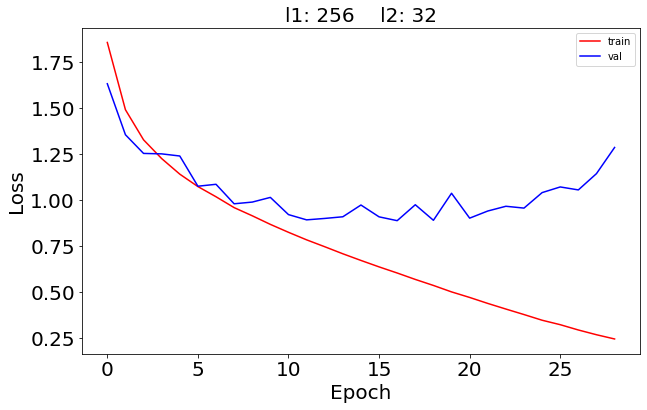

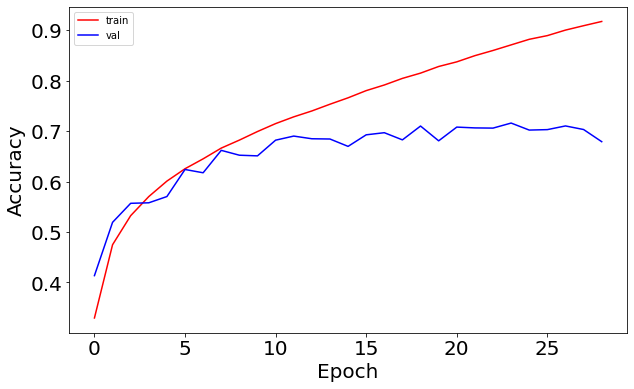

In [42]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'b', label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.set_title('l1: ' + str(l1) + '    l2: ' + str(l2), fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)
plt.show()

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(history.history['accuracy'], 'r', label='train')
ax.plot(history.history['val_accuracy'], 'b', label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)
plt.show()

In [44]:
model.save('keras_CNN_CIFAR10.model')

INFO:tensorflow:Assets written to: keras_CNN_CIFAR10.model\assets
